In [24]:
# Guysnove Lutumba
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Importing data
df = pd.read_csv("us-retail-sales.csv")

In [3]:
#Displaying dataset
df.head()


,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [4]:
# Checking for missing values
df.isna().sum()

Month                 0
Clothing              0
Appliances            0
FoodAndBeverage       0
Automobiles           0
GeneralMerchandise    0
BuildingMaterials     0
dtype: int64

In [5]:
df["Automobiles"]

0       26788
1       28203
2       31684
3       32547
4       32883
        ...  
331    105884
332     91758
333     95219
334     93303
335     96137
Name: Automobiles, Length: 336, dtype: int64

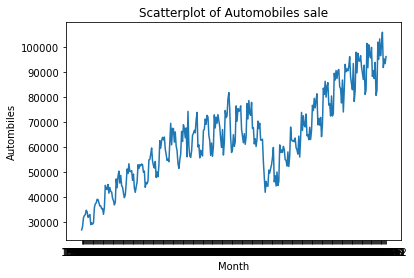

In [6]:
# Trend of Autombiles over time
plt.plot(df['Month'], df['Automobiles'])
plt.xlabel('Month')
plt.ylabel('Autombiles')
plt.title("Scatterplot of Automobiles sale")
plt.show()


In [7]:
# split dataset for test and training
temp_2 = df[["Automobiles"]]

from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_2, test_size=0.2)


In [25]:
# train autoregression
model = AutoReg(train, lags=40)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)



Coefficients: intercept          67243.592231
Automobiles.L1        -0.089132
Automobiles.L2         0.016208
Automobiles.L3        -0.080020
Automobiles.L4         0.002479
Automobiles.L5        -0.041539
Automobiles.L6        -0.032924
Automobiles.L7        -0.034473
Automobiles.L8        -0.004929
Automobiles.L9         0.102151
Automobiles.L10        0.005405
Automobiles.L11       -0.097837
Automobiles.L12        0.064863
Automobiles.L13       -0.079102
Automobiles.L14       -0.024185
Automobiles.L15       -0.125325
Automobiles.L16       -0.095692
Automobiles.L17       -0.014771
Automobiles.L18       -0.078015
Automobiles.L19        0.093799
Automobiles.L20       -0.066423
Automobiles.L21        0.067099
Automobiles.L22        0.026807
Automobiles.L23        0.077877
Automobiles.L24        0.056238
Automobiles.L25        0.042665
Automobiles.L26        0.025878
Automobiles.L27       -0.036067
Automobiles.L28       -0.018291
Automobiles.L29        0.075632
Automobiles.L30        0.0

In [26]:
# Predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
predictions

268    68992.258573
269    69357.020777
270    72839.354882
271    70006.115796
272    63358.337529
           ...     
331    66675.902827
332    62719.428884
333    64551.124164
334    62143.872871
335    64592.264843
Length: 68, dtype: float64

In [10]:
predictions.iloc[1]

69357.02077710535

In [11]:
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions.iloc[i], test.values[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)


predicted=68992.258573, expected=44566.000000
predicted=69357.020777, expected=50742.000000
predicted=72839.354882, expected=60806.000000
predicted=70006.115796, expected=89438.000000
predicted=63358.337529, expected=56368.000000
predicted=60680.830746, expected=92708.000000
predicted=66683.463806, expected=38489.000000
predicted=68897.411812, expected=66022.000000
predicted=73648.050177, expected=56531.000000
predicted=59990.861896, expected=68678.000000
predicted=67809.479542, expected=35206.000000
predicted=54203.347006, expected=85709.000000
predicted=61848.830933, expected=76416.000000
predicted=62505.488848, expected=50191.000000
predicted=62722.083489, expected=51156.000000
predicted=68996.070576, expected=54920.000000
predicted=57811.478462, expected=60823.000000
predicted=67708.244949, expected=73817.000000
predicted=57752.815604, expected=90587.000000
predicted=68637.483794, expected=96499.000000
predicted=65297.960169, expected=62092.000000
predicted=68591.324946, expected=9

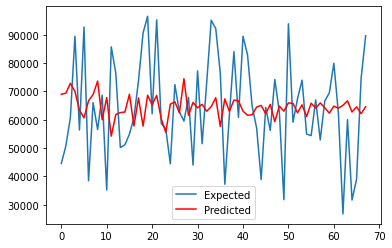

In [12]:
# plot results
pyplot.plot(test.values)
pyplot.plot(predictions.values, color='red')

pyplot.legend(['Expected', 'Predicted'])
pyplot.show()

In [27]:
#implement moving average

# MA over a period of 10 and 20 months
temp_2['MA_10'] = temp_2.Automobiles.rolling(10, min_periods=1).mean()
temp_2['MA_20'] = temp_2.Automobiles.rolling(20, min_periods=1).mean()


Text(0, 0.5, 'Sales')

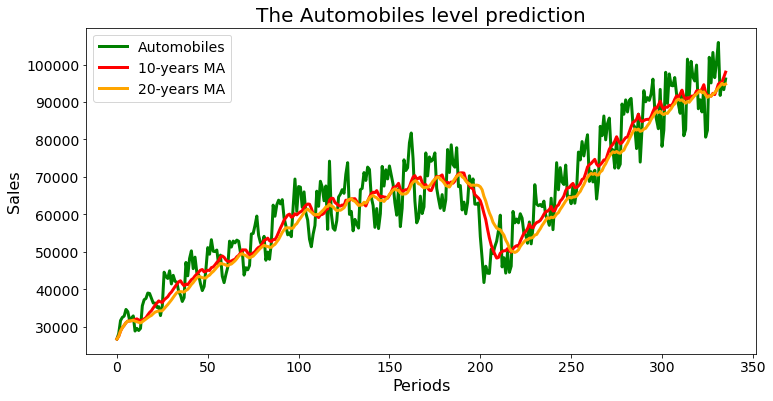

In [17]:
# Grean = Avg Air Temp, RED = 10 yrs, ORANG colors for the line plot
colors = ['green', 'red', 'orange']
# Line plot 
temp_2.plot(y=["Automobiles","MA_10","MA_20"], color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(labels =['Automobiles', '10-years MA', '20-years MA'], fontsize=14)

plt.title('The Automobiles level prediction', fontsize=20)
plt.xlabel('Periods', fontsize=16)
plt.ylabel('Sales', fontsize=16)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
expected = temp_2['Automobiles']
predicted = temp_2['MA_10']
print(f'Mean Absolute Error 10 = {mean_absolute_error(expected, predicted)}')
print(f'Mean Squared Error 20= {mean_squared_error(expected, predicted)}')
predicted = temp_2['MA_20']
print(f'Mean Absolute Error 10= {mean_absolute_error(expected, predicted)}')
print(f'Mean Squared Error 20= {mean_squared_error(expected, predicted)}')



Mean Absolute Error 10 = 5121.882286942555
Mean Squared Error 20= 36249034.75347132
Mean Absolute Error 10= 5455.832596810245
Mean Squared Error 20= 43350107.42015761


In [20]:
#weighted moving average with a 10 interval
import random
weights = []
for i in range(10):
    n = random.uniform(0,1)
    weights.append(n)
weights

[0.5795329096733454,
 0.7298327160664113,
 0.3562095354835094,
 0.998160562232779,
 0.7793840872839899,
 0.7897137696002507,
 0.2702884303567512,
 0.4297233756962252,
 0.11090797800318597,
 0.05959846474707464]

In [28]:

temp_2['WMA_10'] = temp_2.Automobiles.rolling(10).apply(lambda x: np.sum(weights*x))


In [30]:
#Exponential Smoothing Moving Average
#EMA is mainly used to identify trends and to filter out noise. 
#The weight of elements is decreased gradually over time. 
#This means It gives weight to recent data points, not historical ones.

# EMA Temperature
# Let's smoothing factor - 0.1
temp_2['EMA_0.1'] = temp_2.Automobiles.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
temp_2['EMA_0.3'] = temp_2.Automobiles.ewm(alpha=0.3, adjust=False).mean()



In [31]:
temp_2

,Automobiles,MA_10,MA_20,WMA_10,EMA_0.1,EMA_0.3
0,26788,26788.000000,26788.000000,NaN,26788.000000,26788.000000
1,28203,27495.500000,27495.500000,NaN,26929.500000,27212.500000
2,31684,28891.666667,28891.666667,NaN,27404.950000,28553.950000
3,32547,29805.500000,29805.500000,NaN,27919.155000,29751.865000
4,32883,30421.000000,30421.000000,NaN,28415.539500,30691.205500
...,...,...,...,...,...,...
331,105884,94758.400000,93810.750000,471513.331577,95069.573305,99917.080897
332,91758,95199.200000,94348.500000,486521.987035,94738.415974,97469.356628
333,95219,95338.700000,94974.400000,483356.317318,94786.474377,96794.249640
334,93303,96606.500000,94567.500000,497985.640377,94638.126939,95746.874748


Text(0, 0.5, 'A1c_level')

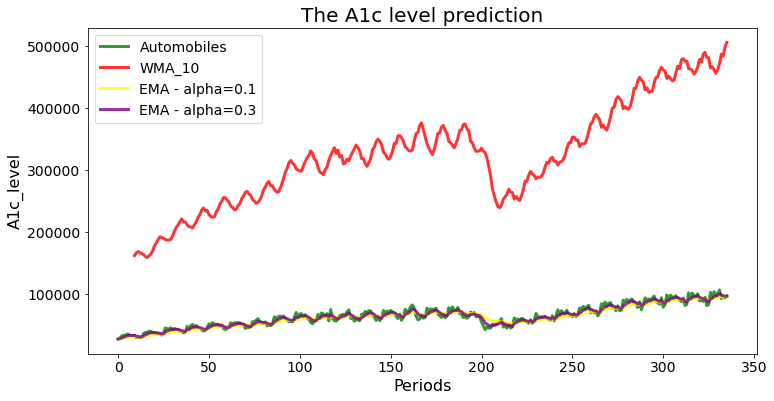

In [32]:
# green - Avg Air Temp, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow', 'purple']
temp_2.plot(y=['Automobiles', 'WMA_10', 'EMA_0.1', 'EMA_0.3'],color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Automobiles', 'WMA_10', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The A1c level prediction', fontsize=20)
plt.xlabel('Periods', fontsize=16)
plt.ylabel('A1c_level', fontsize=16)


Text(0, 0.5, 'A1c_level')

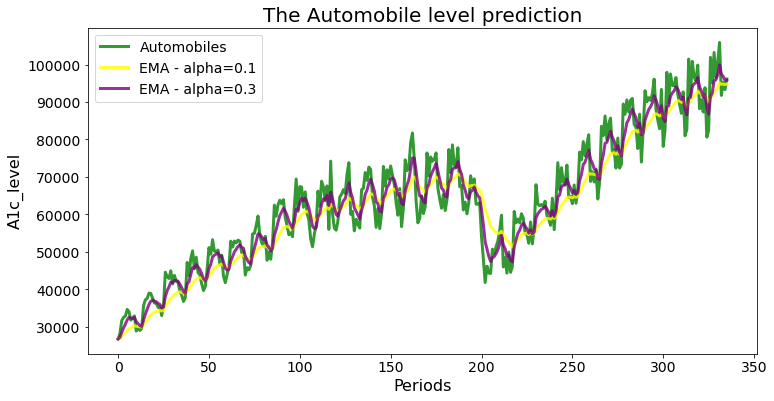

In [33]:
# green - Avg Air Temp, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'yellow', 'purple']
temp_2.plot(y=['Automobiles','EMA_0.1', 'EMA_0.3'],color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Automobiles', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('The Automobile level prediction', fontsize=20)
plt.xlabel('Periods', fontsize=16)
plt.ylabel('A1c_level', fontsize=16)


In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
expected = temp_2['Automobiles']
predicted = temp_2['EMA_0.1']
print(f'Mean Absolute Error 0.1 = {mean_absolute_error(expected, predicted)}')
print(f'Mean Squared Error 0.1= {mean_squared_error(expected, predicted)}')
predicted = temp_2['EMA_0.3']
print(f'Mean Absolute Error 0.3= {mean_absolute_error(expected, predicted)}')
print(f'Mean Squared Error 0.3= {mean_squared_error(expected, predicted)}')


Mean Absolute Error 0.1 = 4930.436662924092
Mean Squared Error 0.1= 35145128.64989003
Mean Absolute Error 0.3= 3290.8850550736574
Mean Squared Error 0.3= 16255072.925595948


In [36]:
#ARIMA

from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(temp_2['Automobiles'], order=(0, 1, 1)) 
results_ARIMA = model.fit()


In [37]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Automobiles   No. Observations:                  336
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -3356.551
Date:                Sat, 16 Apr 2022   AIC                           6717.101
Time:                        12:50:24   BIC                           6724.730
Sample:                             0   HQIC                          6720.143
                                - 336                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3078      0.057     -5.440      0.000      -0.419      -0.197
sigma2      2.956e+07   4.19e-10   7.05e+16      0.000    2.96e+07    2.96e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):                25.41
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
results = results_ARIMA.predict(start=0)
results


0           0.000000
1       19482.758538
2       25547.900810
3       29797.459952
4       31700.881899
           ...      
331     99817.380113
332    104016.935759
333     95530.812705
334     95314.963545
335     93922.202333
Name: predicted_mean, Length: 336, dtype: float64

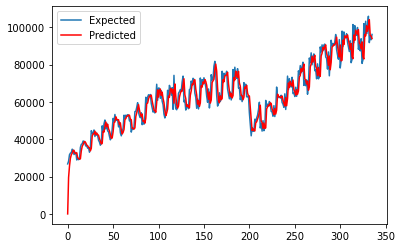

In [40]:
# plot results
pyplot.plot(temp_2['Automobiles'])
pyplot.plot(results, color='red')

pyplot.legend(['Expected', 'Predicted'])
pyplot.show()

In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
expected = temp_2['Automobiles']
print(f'Mean Absolute Error = {mean_absolute_error(expected, results)}')
print(f'Mean Squared Error = {mean_squared_error(expected, results)}')


Mean Absolute Error = 4120.0260852628835
Mean Squared Error = 31588562.574760176
